In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import widgets
from matplotlib.widgets import Slider
import matplotlib.colors as mcolors

In [ ]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [6, 4]

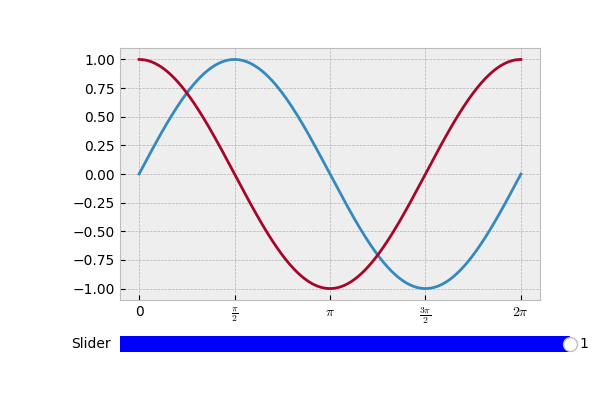

In [ ]:
%matplotlib widget
plt.close('all')
fig, ax = plt.subplots(label='Slider test')
fig.subplots_adjust(bottom=0.25,left=0.2)
ax: plt.Axes
x=np.linspace(0,2*np.pi,1000)
l1, = ax.plot(x,np.sin(x))
l2, = ax.plot(x,np.cos(x))
ax.set_xticks(np.pi/2*np.arange(5), [0,r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

slider_ax = fig.add_axes([0.2, 0.1, 0.75, 0.08])
slider = Slider(slider_ax, 'Slider', 0, 1, valinit=1)

def update(val):
    l1.set_xdata(x[:int(len(x)*val)])
    l1.set_ydata(np.sin(x[:int(len(x)*val)]))
    l2.set_xdata(x[:int(len(x)*val)])
    l2.set_ydata(np.cos(x[:int(len(x)*val)]))
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

# Random squares
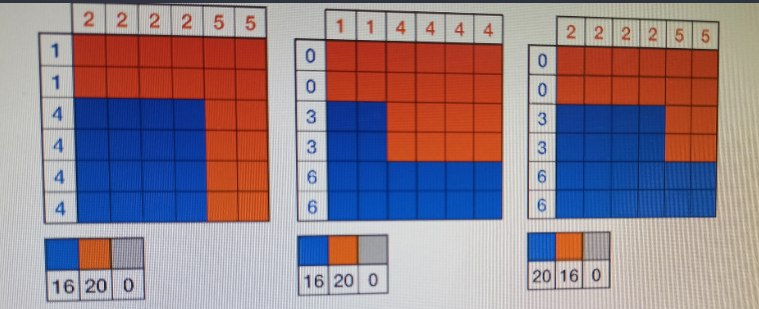

You have 2 six-sided dices with different numbers on faces and you mesure which one is bigger.
The main task is to find a dice with most probability of winning.

I'll try make a plot that shows this square and allows to specify edges or take random

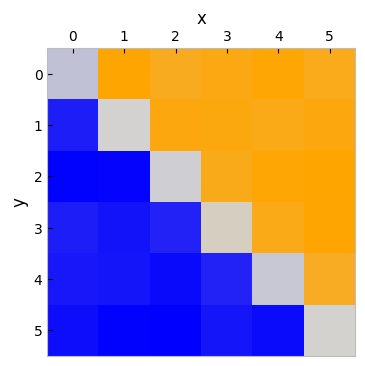

In [ ]:
plt.close('all')
fig,ax = plt.subplots(label="Dice rolls")
ax.set_aspect('equal')
ax.grid(False)

x = np.arange(0, 6, 1)
y = np.arange(0, 6, 1)
xg,yg = np.meshgrid(x,y)
Z = (xg > yg).astype(np.float32)
Z[xg == yg] = 0.5
Z = Z + np.random.rand(*Z.shape)*0.1

cmap = mcolors.LinearSegmentedColormap.from_list('OrangeBlue', ['blue','lightgray', 'orange'])
ax.imshow(Z, cmap=cmap)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xticks(ax.get_xticks()[1:-1],x)
ax.set_yticks(ax.get_yticks()[1:-1],y);

In [ ]:
import textwrap

def make_square(x,y, ax = None):
    if ax==None: _,ax = plt.subplots(label="Dice rolls")
    ax.set_aspect('equal')
    ax.grid(False)

    xg,yg = np.meshgrid(x,y)
    Z = (xg > yg).astype(np.float32)
    Z[xg == yg] = 0.5
    r = Z + np.random.rand(*Z.shape)*0.15
    cmap = mcolors.LinearSegmentedColormap.from_list('OrangeBlue', list(zip([0,0.5,1],['blue','lightgray', 'orange'])))
    ax.imshow(r, cmap=cmap,vmin=0,vmax=1)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(np.arange(0,len(x),1),x)
    ax.set_yticks(np.arange(0,len(y),1),y)

    text = f'Total proportions: blue={np.sum(Z==0)/Z.size:.2f}, orange={np.sum(Z==1)/Z.size:.2f}, gray={np.sum(Z==0.5)/Z.size:.2f}'
    wrapped_text = textwrap.fill(text, width=60)
    if not hasattr(ax,'t'):
        ax.t = ax.text(0.5, -0.1, wrapped_text, transform=ax.transAxes, ha='center', va='top', fontsize=8)
    ax.t.set_text(wrapped_text)

    return ax, r

0

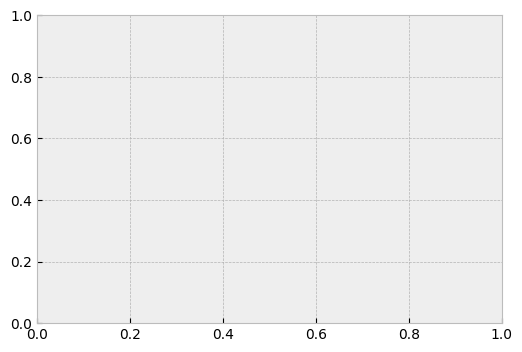

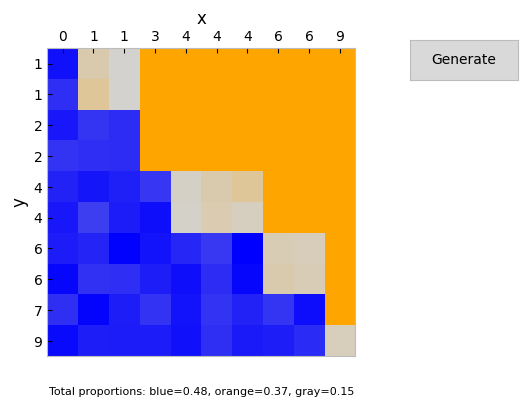

In [ ]:
plt.cla()
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.8)
but_ax = fig.add_axes([0.81, 0.8, 0.18, 0.1])
button = widgets.Button(but_ax, label='Generate',hovercolor='0.75')
def update(_):
    x = np.random.randint(0, 10, 10)
    y = np.random.randint(0, 10, 10)
    x.sort();y.sort()
    fig.axes[0], _ = make_square(x, y, fig.axes[0])
update(None)
button.on_clicked(update)

In [ ]:
class SquareGenerator:
    def __init__(self, fig, len_x, len_y, max_x=6, min_x=0, max_y=6):
        self.fig = fig
        self.len_x = len_x
        self.len_y = len_y
        self.max_x = max_x
        self.min_x = min_x
        self.max_y = max_y

    def update(self, _):
        x = np.random.randint(self.min_x, self.max_x, self.len_x)
        y = np.random.randint(0, self.max_y, self.len_y)
        x.sort(); y.sort()
        self.fig.axes[0], z = make_square(x, y, self.fig.axes[0])
        return z

def random_squares(fig, len_x, len_y, max_x=6,  min_x=0, max_y=6):
    fig.subplots_adjust(right=0.8)
    but_ax = fig.add_axes([0.81, 0.8, 0.18, 0.1])
    button = widgets.Button(but_ax, label='Generate', hovercolor='0.75')

    generator = SquareGenerator(fig, len_x, len_y, max_x, min_x, max_y)
    button.on_clicked(generator.update)
    generator.update(None)

    return button

<matplotlib.widgets.Button>

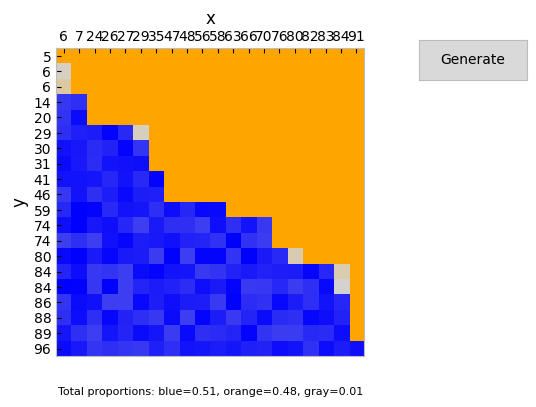

In [ ]:
plt.close('all')
fig, ax = plt.subplots()
random_squares(fig, 20,20,100,0,100)

## Distribution of numbers on faces after taking several random samples

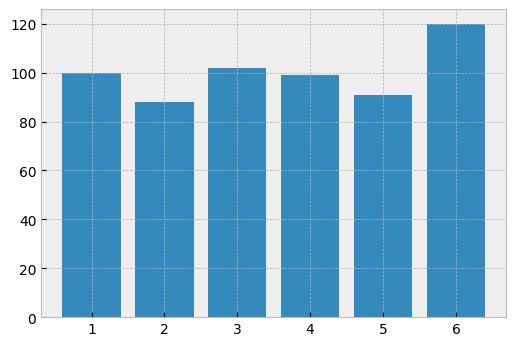

In [ ]:
n = 100
x = np.random.randint(1, 7, (n, 6))
plt.bar(*np.unique(x, return_counts=True));

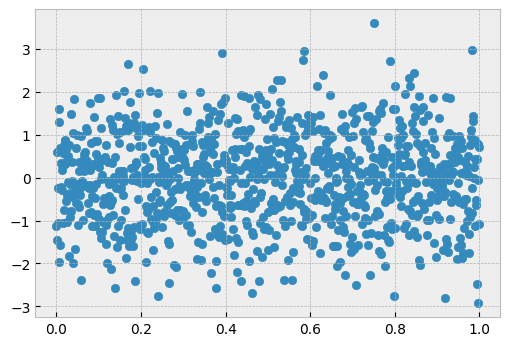

In [ ]:
x = np.linspace(0,1,1000)
y = np.random.randn(1000)
plt.scatter(x,y);

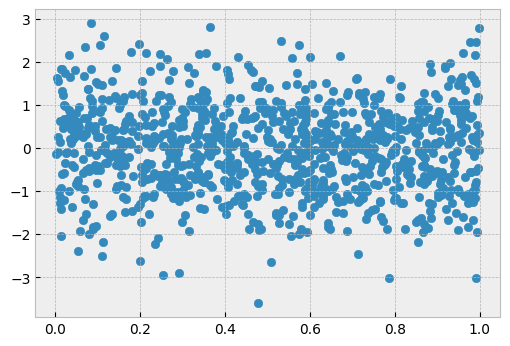

In [ ]:
x = np.random.rand(1000)
y = np.random.randn(1000)
plt.scatter(x,y);